In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib
from sklearn.decomposition import TruncatedSVD
print("success")

success


In [3]:
folder_path_train ="/kaggle/input/facebook-hateful-meme-dataset/data/train.jsonl"
folder_path_dev ="/kaggle/input/facebook-hateful-meme-dataset/data/dev.jsonl"
df_train = pd.read_json(folder_path_train,lines=True)
df_dev=pd.read_json(folder_path_dev,lines=True)

print(df_train.tail())

         id            img  label  \
8495  10423  img/10423.png      1   
8496  98203  img/98203.png      1   
8497  36947  img/36947.png      1   
8498  16492  img/16492.png      1   
8499  15937  img/15937.png      1   

                                                   text  
8495                  nobody wants to hang auschwitz me  
8496  when god grants you a child after 20 years of ...  
8497  gays on social media: equality! body positivit...  
8498  having a bad day? you could be a siamese twin ...  
8499  i hate muslims too they take their religion to...  


# **Check Distribution Of Data in Train and Validation Dataset**

Distribution of training dataset
 label
0    5450
1    3050
Name: count, dtype: int64 

Distribution of validation dataset
 label
1    250
0    250
Name: count, dtype: int64


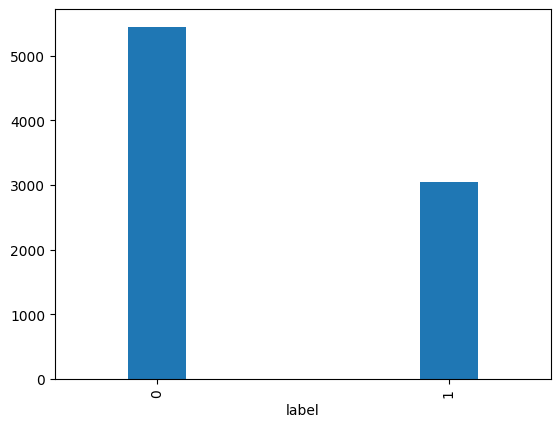

In [4]:
# distribution of movies based on certificate
df_train['label'].value_counts().plot.bar(width=0.2)

print('Distribution of training dataset\n',df_train.label.value_counts(),"\n")
print("Distribution of validation dataset\n",df_dev.label.value_counts())
     

# **Check null values**

In [5]:
print(df_train.isna().sum())

print("\n\n",df_dev.isna().sum())

id       0
img      0
label    0
text     0
dtype: int64


 id       0
img      0
label    0
text     0
dtype: int64


In [6]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


# **load pretrained word embedding model from gensim library**

In [7]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


# **Download and Save model**

In [9]:
import gensim.downloader as api
wv=api.load('glove-twitter-25')

In [10]:
wv.save('/kaggle/working/glove_twitter_25.kv')

# **Use Saved Model**

> **word to vector conversion using gensim 'word2vec-google-news-300' model**

In [12]:
from gensim.models import KeyedVectors
wv=KeyedVectors.load('/kaggle/working/glove_twitter_25.kv')

w=wv["good"]
print(w)
print("\n\nlength of word vector",len(w))

print("\n\n type of word vector model ",type(wv))
print("\n\n word vector type",type(w))

[-0.54403   0.60274  -0.14543  -0.023398 -0.13771   0.60137   2.192
  0.20804  -0.51536  -0.23101  -0.80387   0.56901  -5.0234    0.26507
  0.47891  -0.59854   0.56132  -1.0905   -0.52587   0.12506  -0.22624
  0.24529  -0.45767   0.92619   0.022125]


length of word vector 25


 type of word vector model  <class 'gensim.models.keyedvectors.KeyedVectors'>


 word vector type <class 'numpy.ndarray'>


# **Import spacy library for text preprocessing**

In [14]:
data=df_train
data.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


# **use sapcy 'en_core_web_sm" model for preporocessing**

In [15]:
import spacy.cli
#spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_sm")

# **tokenize each word in a sentence and apply lemmatization on it, remove punctuation, space, brackets if any**

In [16]:
def preprocess(text):
  doc=nlp(text)
  filtered_token=[]

  for token in doc:
  
    if token.is_punct or token.is_space or token.is_bracket:
      continue
    else:
      token=token.lemma_
     
      filtered_token.append(token)
  return filtered_token

# **example showing text preprocessing**

In [17]:
tokens=preprocess("My best friend Anu, (who is three months older than me) is coming to my house tonight!!!.")
tokens

['my',
 'good',
 'friend',
 'Anu',
 'who',
 'be',
 'three',
 'month',
 'old',
 'than',
 'I',
 'be',
 'come',
 'to',
 'my',
 'house',
 'tonight']

# **Apply preprocessing on the text column of training dataset**

In [18]:
data['processed_text']=data['text'].apply(lambda x: preprocess(x))

data

,id,img,label,text,processed_text
0,42953,img/42953.png,0,its their character not their color that matters,"[its, their, character, not, their, color, tha..."
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,"[do, not, be, afraid, to, love, again, everyon..."
2,13894,img/13894.png,0,putting bows on your pet,"[put, bow, on, your, pet]"
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,"[I, love, everything, and, everybody, except, ..."
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...","[everybody, love, chocolate, chip, cookie, eve..."
...,...,...,...,...,...
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me,"[nobody, want, to, hang, auschwitz, I]"
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...,"[when, god, grant, you, a, child, after, 20, y..."
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...,"[gay, on, social, medium, equality, body, posi..."
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...,"[have, a, bad, day, you, could, be, a, siamese..."


# **use gensim pretrained model to vectorize each token in the preprocessed text and take the average of vectors to keep the dimension same**

In [19]:
import numpy as np

def gensim_vector(token):
  vec_size=wv.vector_size
  wv_final=np.zeros(vec_size) # take a vector consisting '0s' having size of wv

  count=1
  for t in token:
    if t in wv:
      count += 1
      wv_final += wv[t] # vectorize word and add to previous value

  return wv_final/count # take the average


# **Apply the vectorization process on processed text column of the training dataset**

In [20]:
text_vector = data["processed_text"].apply(gensim_vector)
data["text_vector"]=text_vector
#data["text_vector"]=data["processed_text"].apply(gensim_vector)
data.head()

,id,img,label,text,processed_text,text_vector
0,42953,img/42953.png,0,its their character not their color that matters,"[its, their, character, not, their, color, tha...","[0.19409333335028756, 0.004764437675476074, -0..."
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,"[do, not, be, afraid, to, love, again, everyon...","[0.02886528308902468, 0.37722207246614353, 0.1..."
2,13894,img/13894.png,0,putting bows on your pet,"[put, bow, on, your, pet]","[-0.31102167069911957, 0.08844533764446776, -0..."
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,"[I, love, everything, and, everybody, except, ...","[-0.445876414142549, 0.2214261084794998, 0.183..."
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...","[everybody, love, chocolate, chip, cookie, eve...","[-0.17712125182151794, 0.18230263516306877, 0...."


In [21]:
len(data.text_vector.iloc[0])

25

# **Save data to a csv file**

In [23]:
data.to_csv("text_vec_300.csv",index=False)

# **EDA for word embedding**

# Prepare data for Box plot

In [25]:
# class label 1
val1=data[data.label==1].text_vector
val1=val1.reset_index().drop(['index'],axis=1)


l=len(val1.text_vector.iloc[0])
val1_new=val1.text_vector.iloc[0].reshape(1,l)
for i in range(1,len(val1)):
  b=val1.text_vector.iloc[i].reshape(1,l)
  val1_new=np.append(val1_new,b,axis=0)
print(val1_new.shape) # get a numpy array of dim nx300, n=(samlples with label 1)

# class label 0
val2=data[data.label==0].text_vector
val2=val2.reset_index().drop(['index'],axis=1)

val2_new=val2.text_vector.iloc[0].reshape(1,l)
for i in range(1,len(val2)):
  b=val2.text_vector.iloc[i].reshape(1,l)
  val2_new=np.append(val2_new,b,axis=0)
print(val2_new.shape)# get a numpy array of dim mx300,m=(samlples with label 0)

(3050, 25)
(5450, 25)


Text(0.5, 0, 'Feature dimension')

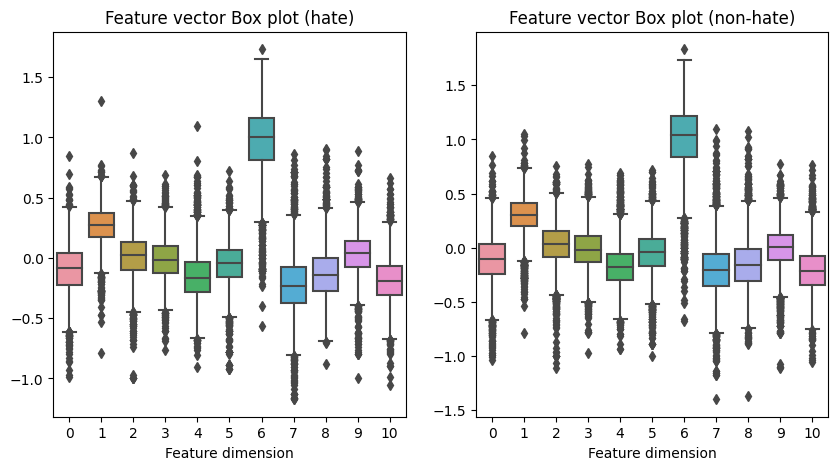

In [27]:
a=val1_new[:,0:11]
b=val2_new[:,0:11]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=a)
plt.title("Feature vector Box plot (hate)")
plt.xlabel('Feature dimension')

plt.subplot(1,2,2)
sns.boxplot(data=b)
plt.title("Feature vector Box plot (non-hate)")
plt.xlabel('Feature dimension')

# **Use PCA for dimension reduction to visualize high dimension feature**

In [28]:

def plot_embedding(X, y):
    truncated_SVD = TruncatedSVD(n_components = 2)
    truncated_SVD.fit(X)
    scores = truncated_SVD.transform(X)
    color_mapper = {label:idx for idx, label in enumerate(set(y))}
    color_column = [color_mapper[label] for label in y]
    colors = ['black', 'red']
        
    plt.scatter(scores[:, 0], scores[:, 1], s = 6, alpha = 0.8, c = y, cmap = matplotlib.colors.ListedColormap(colors))
    red_patch = mpatches.Patch(color = 'black', label = 'non hate')
    blue_patch = mpatches.Patch(color = 'red', label = 'hate')
   
    plt.legend(handles = [red_patch, blue_patch], prop = {"size": 12})


# **Feature distribution for hate and non hate text and dimensionality reduction**

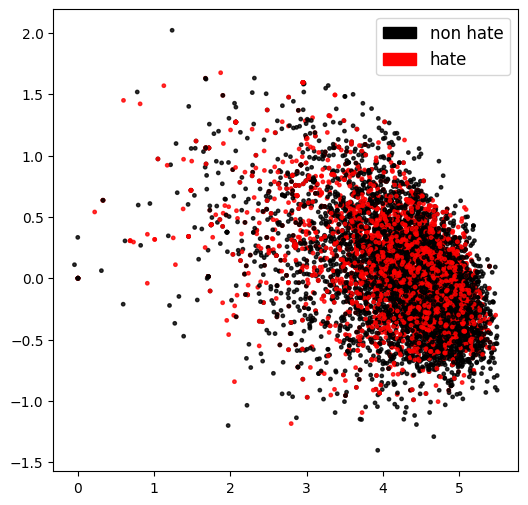

In [29]:
x= np.stack(text_vector)
y=data.label

fig = plt.figure(figsize = (6, 6))          
plot_embedding(x,y)
plt.show()

# **Distribution of Labels**

In [34]:
df_text = pd.DataFrame(df_train + df_dev )

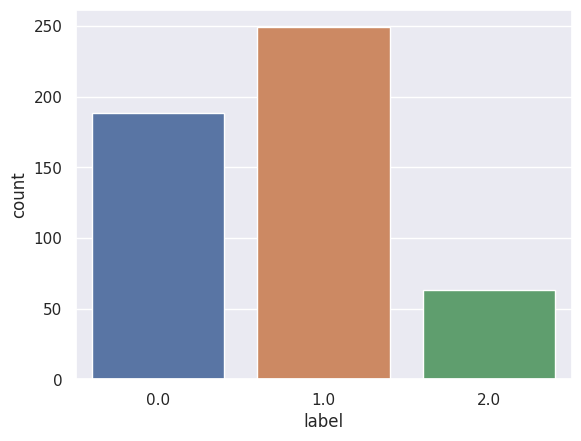

In [35]:
import seaborn as sns
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="label", data=df_text)


# **Import Libraries for NLP**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
import re
import os
import sys

import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm

# Machine Learning packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from collections import Counter
from wordcloud import WordCloud

from pickle import load
import numpy as np
import argparse

import warnings
warnings.filterwarnings('ignore')

# **Set PATH information and spacy parameters**

In [37]:
# Path info
PATH_CURRENT = '/home/jupyter/meme_hateful_detection'
PATH_TRAIN_MEMES = f'{PATH_CURRENT}/data/raw/datasets/hateful_memes'
PATH_DATA = f'{PATH_CURRENT}/data/raw'
PATH_MEMES_DATASET = f'{PATH_DATA}/datasets/hateful_memes/defaults/annotations'
PATH_INTERIM = f'{PATH_CURRENT}/data/interim'

# Spacy parameters
MAX_NB_WORDS = 3000000    # max no. of words for tokenizer
spacy_nlp = spacy.load('en_core_web_sm')
stopwords = spacy.lang.en.stop_words.STOP_WORDS
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) 
nlp.max_length = MAX_NB_WORDS 

In [38]:
def series_to_str(series_column):
    '''This function converts a series to text, concatenating its values'''
    return(' '.join(series_column))
    
def clean_text(str_text_raw):
    '''This function convert a string to lowercase'''
    str_text = str_text_raw.lower()
    return(str_text)
  
def clean_image_path(str_image):
    '''This function clean the path of the image in the dataset'''
    str_image_clean = str_image.replace('img/','')
    return(str_image_clean)
def string_to_token(string, str_pickle = None):
    '''
    This function takes a sentence and returns the list of tokens and all their information
    * Text: The original text of the lexeme.
    * Lemme: Lexeme.
    * Orth: The hash value of the lexeme.
    * is alpha: Does the lexeme consist of alphabetic characters?
    * is digit: Does the lexeme consist of digits?
    * is_title: Is the token in titlecase? 
    * is_punct: Is the token punctuation?
    * is_space: Does the token consist of whitespace characters?
    * is_stop: Is the token part of a “stop list”?
    * is_digit: Does the token consist of digits?
    * lang: Language of the token
    * tag: Fine-grained part-of-speech. The complete list is in: 
    https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html, also using: spacy.explain("RB")
    * pos: Coarse-grained part-of-speech.
    * has_vector: A boolean value indicating whether a word vector is associated with the token.
    * vector_norm: The L2 norm of the token’s vector representation.'''
    doc = nlp(string)
    l_token = [[token.text, token.lemma_, token.orth, token.is_alpha, token.is_digit, token.is_title, token.lang_, 
        token.tag_, token.pos_, token.has_vector, token.vector_norm, token.is_oov]
        for token in doc if not token.is_punct | token.is_space | token.is_stop | token.is_digit | token.like_url 
               | token.like_num | token.like_email & token.is_oov]
    df_token = pd.DataFrame(l_token, columns=['text', 'lemme', 'orth', 'is_alpha', 'is_digit', 'is_title', 'language',
                                          'tag', 'part_of_speech', 'has_vector', 'vector_norm', 'is_oov'])
    #Convert plural text to singular
    df_token['text_to_singular'] = np.where(df_token['tag'].isin(['NNPS', 'NNS']), df_token['lemme'], df_token['text'])
    if(str_pickle!=None):
        df_token.to_pickle(f'../data/interim/{str_pickle}.pkl')
    del l_token
    return(df_token)
def list_to_bow(l_words):
    '''
    This function takes a list of words and create the bag of words ordered by desc order
    '''
    cv = CountVectorizer(l_words)
    # show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
    count_vector=cv.fit_transform(l_words)
    word_freq = Counter(l_words)
    print(f'Bag of words size: {count_vector.shape}\nUnique words size: {len(word_freq)}')
    dict_word_freq = dict(word_freq.most_common())
    return(dict_word_freq)

def create_wordcloud(dict_words, b_plot=False, title_plot='Most lemma words'):
    wordcloud = WordCloud(width = 1000, height = 500, normalize_plurals=True).generate_from_frequencies(dict_words)
    if(b_plot==True):
        plt.figure(figsize=(20,8))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.title(title_plot, fontsize=25)
        plt.show
    return(wordcloud)

def apply_cleaning(string):
    '''
    This function takes a sentence and returns a clean text
    '''
    doc = nlp(clean_text(string))
    l_token = [token.text for token in doc if not token.is_punct | token.is_space | token.is_stop | 
               token.is_digit | token.like_url | token.like_num | token.like_email & token.is_oov]
    return ' '.join(l_token)
def apply_lemma(string):
    '''
    This function takes a sentence and returns a clean text
    '''
    doc = nlp(clean_text(string))
    l_token = [token.lemma_ for token in doc if not token.is_punct | token.is_space | token.is_stop | 
               token.is_digit | token.like_url | token.like_num | token.like_email & token.is_oov]
    return ' '.join(l_token)
def generate_description(image_file):
    tokenizer = load(open(f'{PATH_MODEL}/tokenizer.pkl', 'rb'))
    index_word = load(open(f'{PATH_MODEL}/index_word.pkl', 'rb'))
    # pre-define the max sequence length (from training)
    max_length = 34

    # load the model
    filename = f'{PATH_MODEL}/model_weight.h5'
    model = load_model(filename)

    image=f'/home/jupyter/meme_hateful_detection/data/raw/facebook_memes/{image_file}'
    print(image)
    if(os.path.exists(image)):  
        photo = em.extract_features(image)
        # generate description
        captions = em.generate_desc(model, tokenizer, photo, index_word, max_length)
        text_image = []
        for cap in captions:
            # remove start and end tokens
            seq = cap[0].split()[1:-1]
            desc = ' '.join(seq)
            text_image.append(desc)
#         print('{} [log prob: {:1.2f}]'.format(desc,cap[1]))
        del image
        del captions
        return(text_image)
    else:
        return([''])

In [42]:
df_memes_normal  = df_train[df_train['label']==0]
df_memes_hateful = df_train[df_train['label']==1]
str_text_total_clean  = series_to_str(df_train.text)
str_text_total_normal = series_to_str(df_memes_normal.text)
str_text_total_hateful= series_to_str(df_memes_hateful.text)
print(f'Total bow with length: {len(str_text_total_clean)}')
print(f'Total normal memes with length: {len(str_text_total_normal)}')
print(f'Total hateful memes with length: {len(str_text_total_hateful)}')

Total bow with length: 536143
Total normal memes with length: 324218
Total hateful memes with length: 211924


# **Wordcloud of all the training text data**

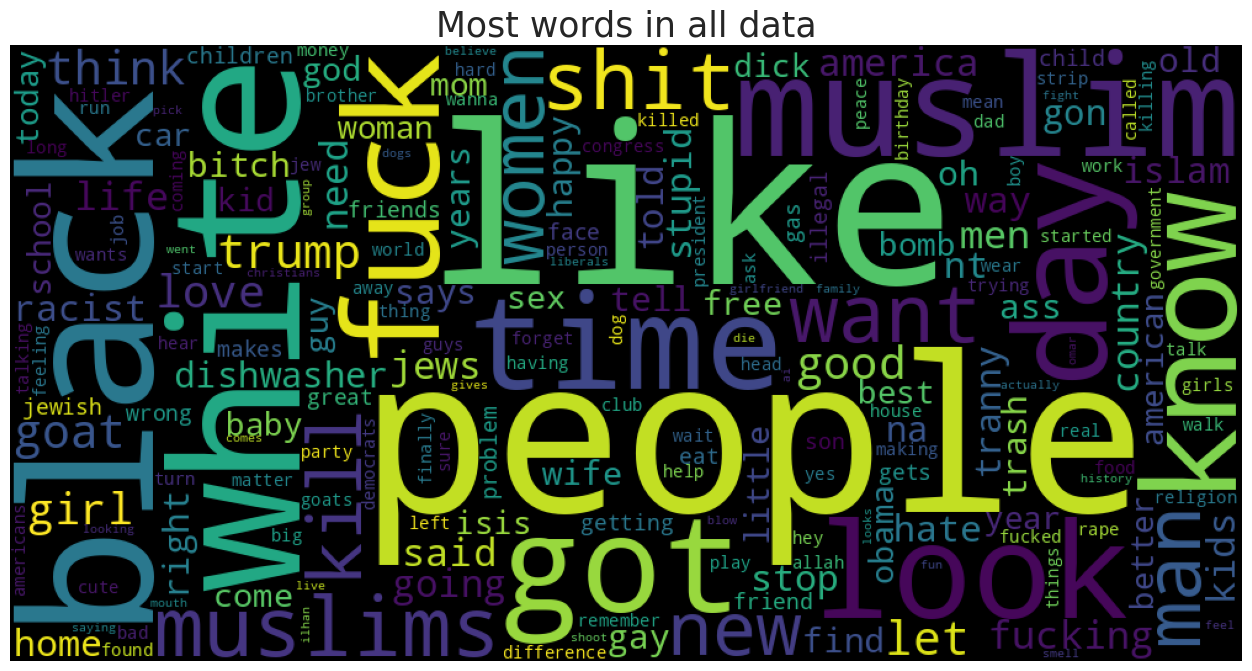

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

def list_to_bow(l_words):
    '''
    This function takes a list of words and creates the bag of words (BoW) ordered by descending frequency.
    '''
    cv = CountVectorizer()  # Initialize CountVectorizer without any arguments
    count_vector = cv.fit_transform(l_words)  # Pass the list of words to fit_transform
    bow_dict = dict(zip(cv.get_feature_names_out(), count_vector.toarray().sum(axis=0)))  # Create BoW dictionary
    return bow_dict

df_token = string_to_token(str_text_total_clean)
dict_word_freq_lemme = list_to_bow(list(df_token['text']))
wordcloud = create_wordcloud(dict_word_freq_lemme, b_plot=True, title_plot='Most words in all data')


# **Wordcloud of not-hateful memes text data**

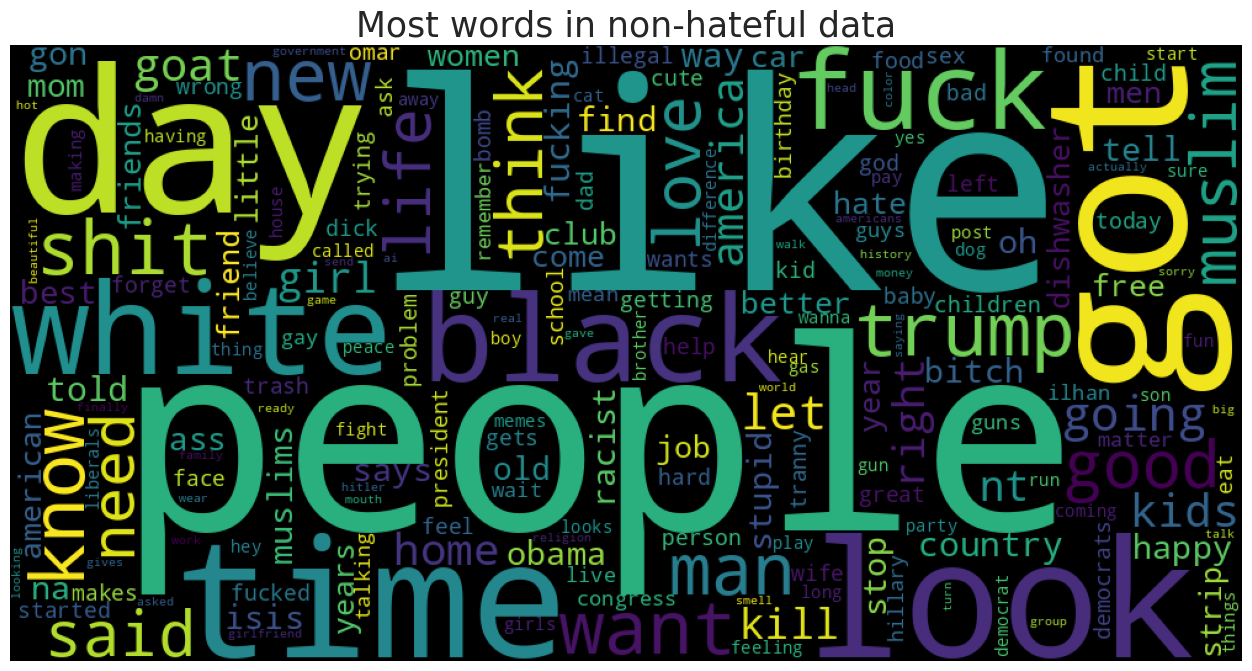

In [47]:
df_token = string_to_token(str_text_total_normal)
dict_word_freq_lemme = list_to_bow(list(df_token['text']))
wordcloud = create_wordcloud(dict_word_freq_lemme, b_plot=True, title_plot='Most words in non-hateful data')